In [511]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns

In [513]:
def convertir_columna_a_numeros(columna):
    valores_unicos = columna.dropna().unique()
    mapping = {valor: indice for indice, valor in enumerate(valores_unicos)}
    return columna.map(mapping)

def convertir_dataframe(df, columnas):
    for col in columnas:
        df[col] = convertir_columna_a_numeros(df[col].astype(str))
    return df

In [515]:
EmpleadosAttrition = pd.read_csv("0.mikh5r1gs60.fukzkek4yb4empleadosRETO.csv")
EmpleadosAttrition = EmpleadosAttrition.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1)
columnas_convertir = ["BusinessTravel", "Department", "EducationField", "JobRole", "MaritalStatus", "Gender", "OverTime","Attrition"]
ParaSueldo = EmpleadosAttrition[["Department","MonthlyIncome"]]
EmpleadosAttrition = convertir_dataframe(EmpleadosAttrition, columnas_convertir)
EmpleadosAttrition["DistanceFromHome_km"] = EmpleadosAttrition["DistanceFromHome"]
EmpleadosAttrition["DistanceFromHome"] = EmpleadosAttrition["DistanceFromHome"].str.split().str[0].astype(int)
EmpleadosAttrition

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsSinceLastPromotion,Attrition,DistanceFromHome_km
0,50,0,0,1,2,0,4,0,3,4,...,22,4,3,32,1,2,4,1,0,1 km
1,36,0,0,6,2,0,2,0,3,2,...,20,4,4,7,0,3,2,0,0,6 km
2,21,0,1,7,1,1,2,0,3,1,...,13,3,2,1,3,3,0,1,1,7 km
3,52,0,0,7,4,2,2,0,3,3,...,19,3,4,18,4,3,6,4,0,7 km
4,33,0,0,15,1,0,2,0,3,3,...,12,3,4,15,2,4,6,7,1,15 km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,33,0,0,14,3,0,3,0,3,1,...,13,3,3,8,2,1,4,0,1,14 km
396,31,0,1,20,3,2,2,1,1,2,...,11,3,3,4,2,3,2,2,1,20 km
397,37,2,0,11,3,4,2,0,3,3,...,14,3,3,10,1,3,8,0,0,11 km
398,38,0,0,4,2,0,4,1,3,1,...,19,3,4,7,5,2,0,0,0,4 km


In [517]:
X = EmpleadosAttrition.drop(["Attrition","HiringDate","DistanceFromHome_km"], axis = 1)
y = EmpleadosAttrition["Attrition"]
selector = SelectKBest(k = 18)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
model = LogisticRegression(max_iter=10000)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
selected_feature_names = X.columns[selected_features]
print(f"Selected feature names: {selected_feature_names}")

Accuracy: 0.88
Selected feature names: Index(['Age', 'Department', 'EducationField', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'OverTime', 'PercentSalaryHike', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsInCurrentRole',
       'YearsSinceLastPromotion'],
      dtype='object')


In [519]:
EmpleadosAttrition["Year"] = EmpleadosAttrition["HiringDate"].str.split("/").str[-1].astype(int)
EmpleadosAttrition["YearsAtCompany"] = 2018 - EmpleadosAttrition["Year"]
EmpleadosAttrition[["Year","YearsAtCompany","DistanceFromHome_km","DistanceFromHome"]]

,Year,YearsAtCompany,DistanceFromHome_km,DistanceFromHome
0,2013,5,1 km,1
1,2015,3,6 km,6
2,2017,1,7 km,7
3,2010,8,7 km,7
4,2011,7,15 km,15
...,...,...,...,...
395,2013,5,14 km,14
396,2016,2,20 km,20
397,2008,10,11 km,11
398,2018,0,4 km,4


In [521]:
EmpleadosAttrition = EmpleadosAttrition.drop(["Year", "HiringDate", "DistanceFromHome_km"], axis = 1)
sueldo_promedio = ParaSueldo.groupby("Department")["MonthlyIncome"].mean()
SueldoPromedioDepto = pd.DataFrame(sueldo_promedio)
SueldoPromedioDepto.rename(columns={"MonthlyIncome": "SueldoPromedio"}, inplace=True)
SueldoPromedioDepto

,SueldoPromedio
Department,
Human Resources,6239.888889
Research & Development,6804.149813
Sales,7188.250000


In [523]:
escalador = preprocessing.MinMaxScaler()
SueldoPromedioDepto["SueldoPromedio"] = escalador.fit_transform(SueldoPromedioDepto["SueldoPromedio"].to_numpy().reshape(-1, 1))
SueldoPromedioDepto

,SueldoPromedio
Department,
Human Resources,0.000000
Research & Development,0.594985
Sales,1.000000


In [525]:
Data = EmpleadosAttrition.corr()
mask = abs(Data["Attrition"].astype(float)) > .1
mask

Age                          True
BusinessTravel              False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction      True
Gender                      False
JobInvolvement               True
JobLevel                     True
JobRole                     False
JobSatisfaction              True
MaritalStatus               False
MonthlyIncome                True
NumCompaniesWorked          False
OverTime                     True
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
TotalWorkingYears            True
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsInCurrentRole           True
YearsSinceLastPromotion     False
Attrition                    True
YearsAtCompany               True
Name: Attrition, dtype: bool

In [527]:
EmpleadosAttritionFinal = EmpleadosAttrition[EmpleadosAttrition.columns[mask]]
EmpleadosAttritionFinal

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,OverTime,TotalWorkingYears,YearsInCurrentRole,Attrition,YearsAtCompany
0,50,4,3,4,4,17399,0,32,4,0,5
1,36,2,3,2,2,4941,0,7,2,0,3
2,21,2,3,1,2,2679,0,1,0,1,1
3,52,2,3,3,2,10445,0,18,6,0,8
4,33,2,3,3,3,13610,1,15,6,1,7
...,...,...,...,...,...,...,...,...,...,...,...
395,33,3,3,1,4,2436,1,8,4,1,5
396,31,2,1,2,3,4559,1,4,2,1,2
397,37,2,3,3,4,12185,1,10,8,0,10
398,38,4,3,1,3,3306,0,7,0,0,0


In [529]:
pca = PCA(2)
pca.fit(EmpleadosAttritionFinal.drop(["Attrition"], axis = 1))
print(pca.components_)
print("Ratio = ",pca.explained_variance_ratio_)

[[ 7.88889039e-04 -1.11509847e-05 -4.52350949e-06  2.18447247e-04
  -1.47384271e-06  9.99998757e-01 -2.93013784e-06  1.17203793e-03
   2.88509713e-04  5.98546688e-04]
 [ 8.98401724e-01  2.12622118e-03  3.98182803e-03  7.72521638e-03
   8.67110716e-04 -1.26675443e-03 -2.06640070e-03  4.32815279e-01
   3.12104224e-02  6.69664399e-02]]
Ratio =  [9.99994493e-01 2.98247670e-06]


In [531]:
EmpleadosAttritionPCA = pca.transform(EmpleadosAttritionFinal.drop(["Attrition"], axis = 1))
EmpleadosAttritionPCA

array([[ 1.04884936e+04,  5.86514794e+00],
       [-1.96953347e+03, -1.96942232e+00],
       [-4.23155152e+03, -1.53810203e+01],
       [ 3.53448957e+03,  1.06611561e+01],
       [ 6.69946653e+03, -1.17843660e+01],
       [ 3.42250729e+03,  1.17288370e+01],
       [-2.13554845e+03, -1.57001727e+01],
       [-1.54253373e+03, -4.90920701e+00],
       [ 3.94447990e+03, -1.51368329e+00],
       [-1.83953778e+03, -9.58797831e+00],
       [-4.50452798e+03,  5.06375139e+00],
       [ 4.06549296e+03,  1.43923696e+01],
       [-4.59753572e+03, -2.28409352e+00],
       [ 3.69847852e+03, -3.21492722e+00],
       [ 1.18784855e+04, -1.68233148e+00],
       [ 3.01347074e+03, -4.59522296e+00],
       [-2.28353070e+03, -5.26620113e+00],
       [-1.50451462e+03,  2.01778361e+00],
       [ 1.29224807e+04, -9.76507437e+00],
       [ 7.94149718e+03,  8.54012160e+00],
       [-1.44052934e+03, -4.43501413e+00],
       [-2.87552090e+03,  1.49524973e+01],
       [-8.19533179e+02, -6.89308863e+00],
       [-5.

<Axes: xlabel='PCA1', ylabel='PCA2'>

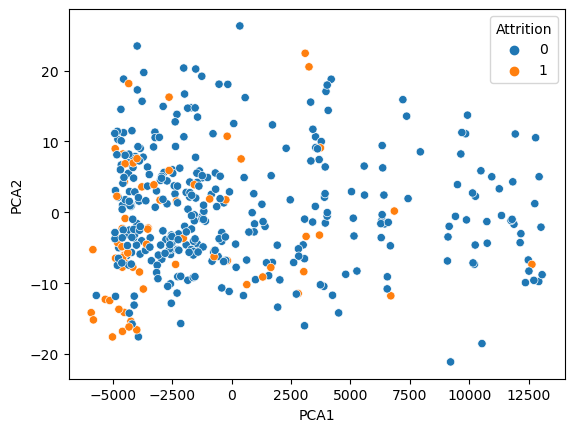

In [533]:
Scatter = pd.DataFrame({"PCA1": EmpleadosAttritionPCA[:,0],"PCA2": EmpleadosAttritionPCA[:,1], "Attrition" : EmpleadosAttritionFinal["Attrition"] })
sns.scatterplot(data = Scatter, x ="PCA1", y = "PCA2", hue =  "Attrition")

In [535]:
EmpleadosAttritionFinal.to_csv("EmpleadosAttritionFinal.csv", index=False)